# PERFOORMING SVM ON TITANIC DATASET WITH AND WITHOUT PCA

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
folder_name = r"C:/Sumay"
name = "titanic.csv"
print(os.path.join(folder_name,name))

C:/Sumay\titanic.csv


In [2]:
df = pd.read_csv('C:/Sumay/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

## Performing Logistic Regression

### Data Preprocessing

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Checking percentage of missing values in Age, Cabin and Embarked
percage = ((df['Age'].isnull().sum())/(df.shape[0]))*100
perccab = ((df['Cabin'].isnull().sum())/(df.shape[0]))*100
percemb = ((df['Embarked'].isnull().sum())/(df.shape[0]))*100
print("Percentage of missing records in age is", percage)
print("Percentage of missing records in cabin is", perccab)
print("Percentage of missing records in embarked is", percemb)

Percentage of missing records in age is 19.865319865319865
Percentage of missing records in cabin is 77.10437710437711
Percentage of missing records in embarked is 0.22446689113355783


'Age' and 'Embarked' have a relatively less percentage of missing values, which is why it is possible to impute them with information whereas 'Cabin' has a very high percentage of missing values, hence it would not be good to impute it with info as it would no longer provide a natural variation to the model.

Now, let's analyze age and embarked separately to determine the value to be imputed

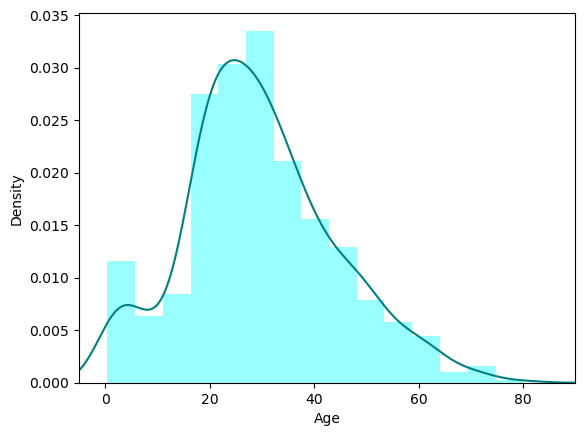

In [6]:
#Visualising 'Age' parameter
pl = df['Age'].hist(bins=15, density=True, stacked=True, color='cyan', alpha=0.4) #bins specifies number of bins data is split into, density=True provides probability density, stacked=True allows stacking od data, alpha specifies transparency of graph, for example alpha of 0.4 means graph is 60% transparent
df['Age'].plot(kind='density', color='teal') #kind=density allows the density plot
pl.set(xlabel='Age')
plt.xlim(-5, 90)
plt.show()

As we can see, Age is right skewed, so imputing null values with the mean would not be ideal as we might fill ages older than desired in some places. Hence it is better to impute with median.

In [7]:
#Imputing 'Age' parameter
med = df['Age'].median(skipna=True)
print(med)
df['Age'].fillna(df['Age'].median(skipna=True), inplace=True)

28.0


Embarked column has only 2 missing values, therefore we can replace them with the value that occurs the most.

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


C:\Users\talkt\AppData\Local\Temp\ipykernel_12056\4210226264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='Set2')


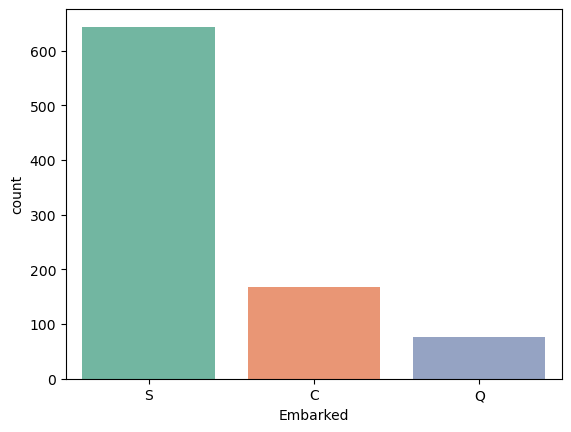

In [8]:
#Visualising 'Embarked' parameter
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.show()

S - Southampton occurs the most, so we can impute missing values with S

In [9]:
#Imputing 'Embarked' parameter
df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

C:\Users\talkt\AppData\Local\Temp\ipykernel_12056\2332528521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)


Since 'Cabin' parameter has a large percentage of missing values, we can drop the column.

In [10]:
#Dropping 'Cabin' parameter
df.drop('Cabin', axis=1, inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Both SibSP and Parch involve travelling with family, so we can combine these 2 into one variable which specifies if the passenger is travelling alone or with family.

In [12]:
#Combining SibSp and Parch variables into one
df['TravelAlone']=np.where((df['SibSp']+df['Parch'])>0, 0, 1) #np.where works in a way where we specify a condition and expressions for corresponding Boolean variables where if condition is true the first expression is taken else the second
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)

PassengerID, Name and Ticket clearly dont affect the model at all so we can drop them.

In [13]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

In [14]:
df.shape

(891, 7)

In [15]:
tempdf=df

In [16]:
#Converting categorical variables into numeric
df=pd.get_dummies(df, columns=["Pclass", "Embarked", "Sex"], dtype=float)
df

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1,38.0,71.2833,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,26.0,7.9250,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,35.0,53.1000,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,35.0,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
887,1,19.0,30.0000,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
888,0,28.0,23.4500,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
889,1,26.0,30.0000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Exploratory Data Analysis

Filtering data from redundancies

##### Exploration of Age

C:\Users\talkt\AppData\Local\Temp\ipykernel_12056\4104626495.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['Age'][df.Survived==1], color="darkturquoise", shade=True)
C:\Users\talkt\AppData\Local\Temp\ipykernel_12056\4104626495.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'][df.Survived==0], color="lightcoral", shade=True)


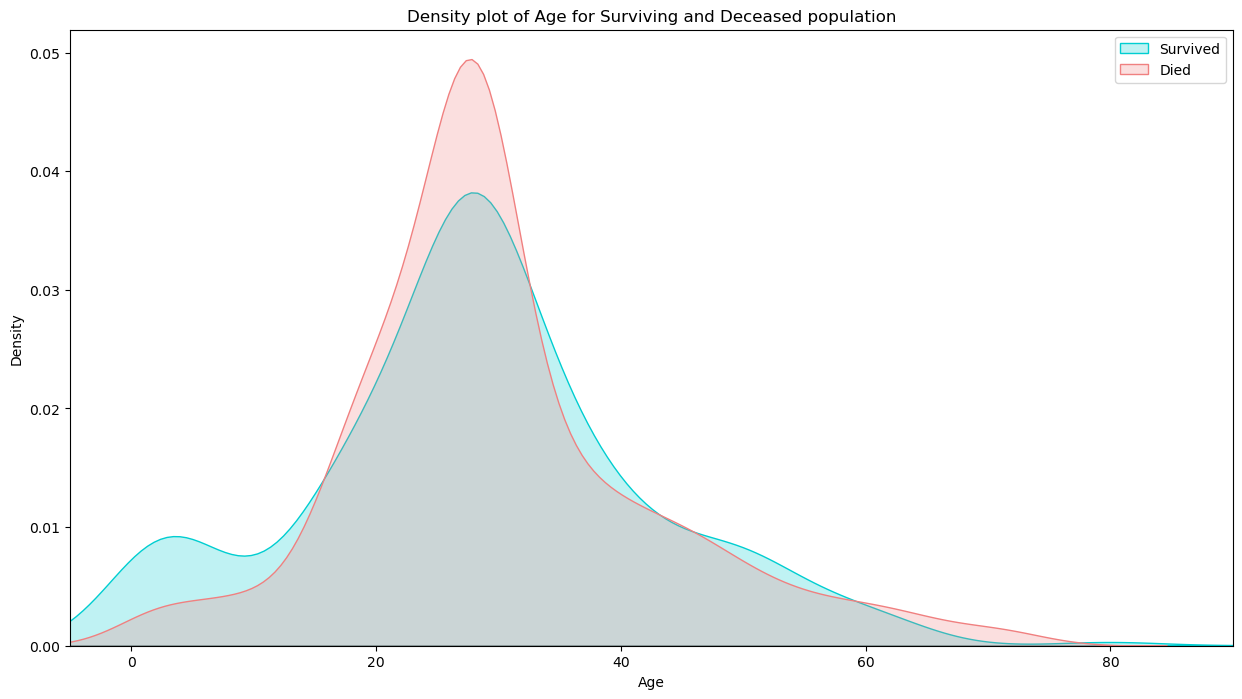

In [17]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df['Age'][df.Survived==1], color="darkturquoise", shade=True)
sns.kdeplot(df['Age'][df.Survived==0], color="lightcoral", shade=True)
#kdeplot plots univariate or bivariate data using a continous probability density curve
#shade=True enables shading area under curve
plt.legend(['Survived', 'Died'])
plt.title('Density plot of Age for Surviving and Deceased population')
ax.set(xlabel='Age')
plt.xlim(-5,90)
plt.show()

The pattern is similar for both, however relatively higher number of children survived.

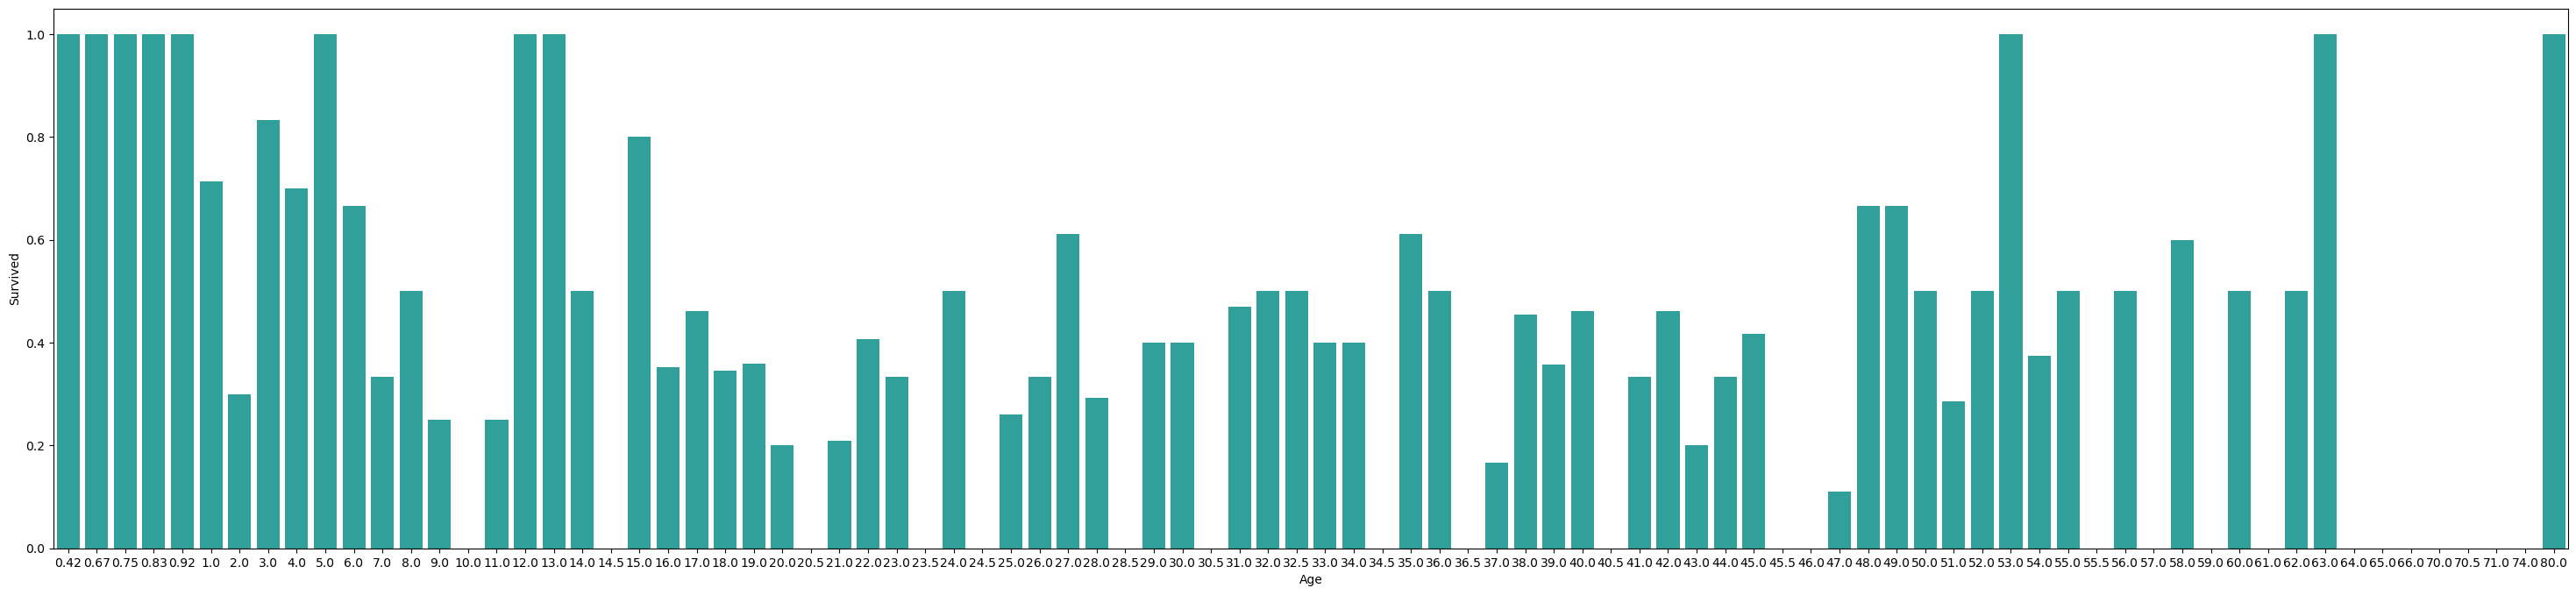

In [18]:
plt.figure(figsize=(37,8))
avg_survival_byage = df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

Passengers under 16 have a very high survival rate, hence this would affect the model greatly, so we can create another variable IsMinor.

In [19]:
df['IsMinor']=np.where(df['Age']<=16, 1, 0)

In [20]:
df

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,IsMinor
0,0,22.0,7.2500,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,1,38.0,71.2833,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,1,26.0,7.9250,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,1,35.0,53.1000,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,0,35.0,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
887,1,19.0,30.0000,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
888,0,28.0,23.4500,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
889,1,26.0,30.0000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


##### Exploration of Fare

C:\Users\talkt\AppData\Local\Temp\ipykernel_12056\19620815.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df["Fare"][df.Survived == 1], color="darkturquoise", shade=True)
C:\Users\talkt\AppData\Local\Temp\ipykernel_12056\19620815.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Fare"][df.Survived == 0], color="lightcoral", shade=True)


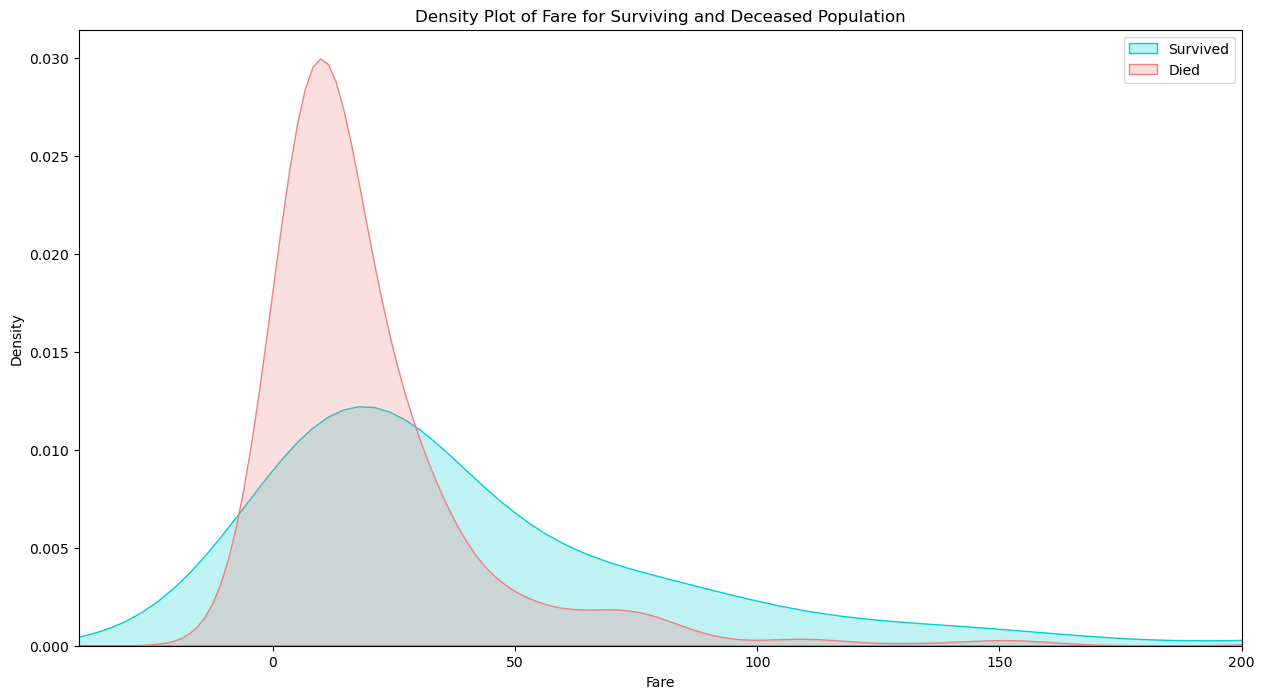

In [21]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Fare"][df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Fare"][df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-40,200)
plt.show()

From the above curve, we can see that passengers who paid lesser dare were more likely to die.

##### Exploration of Passenger Class

In [22]:
df

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,IsMinor
0,0,22.0,7.2500,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,1,38.0,71.2833,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,1,26.0,7.9250,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,1,35.0,53.1000,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,0,35.0,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
887,1,19.0,30.0000,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
888,0,28.0,23.4500,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
889,1,26.0,30.0000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


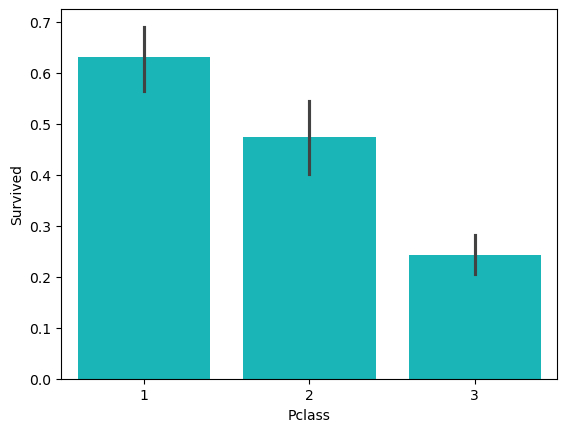

In [23]:
sns.barplot(x='Pclass',y='Survived', data=tempdf, color="darkturquoise")
plt.show()

Evidently from the previous exploration fo fare and the above bar plot a first class passenger was safest.

##### Exploration of Embarked Port

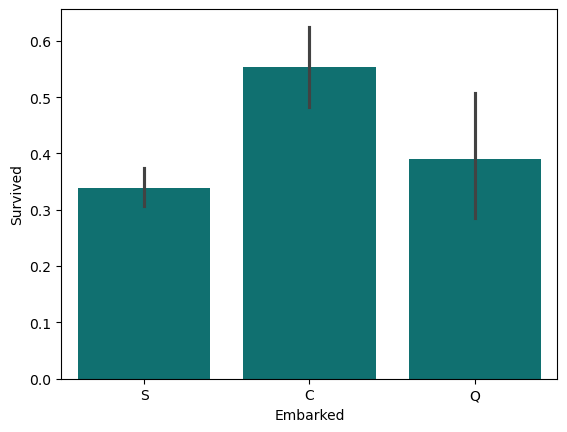

In [24]:
sns.barplot(x='Embarked',y='Survived', data=tempdf, color="teal")
plt.show()

Passengers who boarded in Chebourg were more likely to survive than those in Southampton and Queenstown, which probably has something to do with Passeneger Class.

##### Exploration of Travelling Alone vs With family

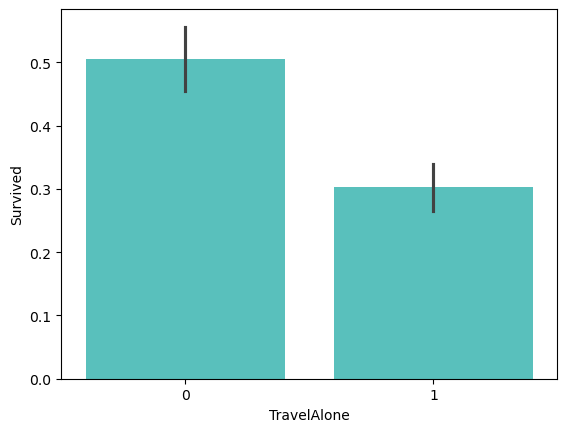

In [25]:
sns.barplot(x='TravelAlone',y='Survived', data=df, color="mediumturquoise")
plt.show()

Individuals travelling without family were more likely to die than those with family.

##### Exploration of Gender

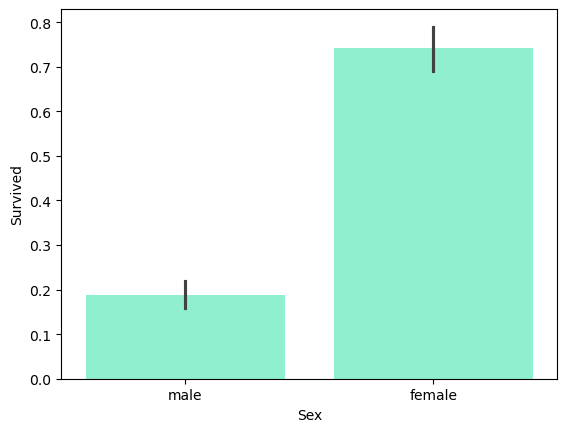

In [26]:
sns.barplot(x='Sex',y='Survived', data=tempdf, color="aquamarine")
plt.show()

Clearly, women were more likely to survive than men.

#### Feature Selection

In [27]:
df

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,IsMinor
0,0,22.0,7.2500,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,1,38.0,71.2833,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,1,26.0,7.9250,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,1,35.0,53.1000,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,0,35.0,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
887,1,19.0,30.0000,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
888,0,28.0,23.4500,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
889,1,26.0,30.0000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [28]:
corr=df.corr()
mat = pd.DataFrame(corr['Survived'])
print(mat)

             Survived
Survived     1.000000
Age         -0.064910
Fare         0.257307
TravelAlone -0.203367
Pclass_1     0.285904
Pclass_2     0.093349
Pclass_3    -0.322308
Embarked_C   0.168240
Embarked_Q   0.003650
Embarked_S  -0.149683
Sex_female   0.543351
Sex_male    -0.543351
IsMinor      0.121485


From the above correlation matrix, we can tell that Embarked_Q has a very very low correlation with survival rate, hence we can remove it.

In [29]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2", "Pclass_3", "Embarked_C", "Embarked_S", "Sex_female", "Sex_male", "IsMinor"]
X = df[cols]
y = df['Survived']

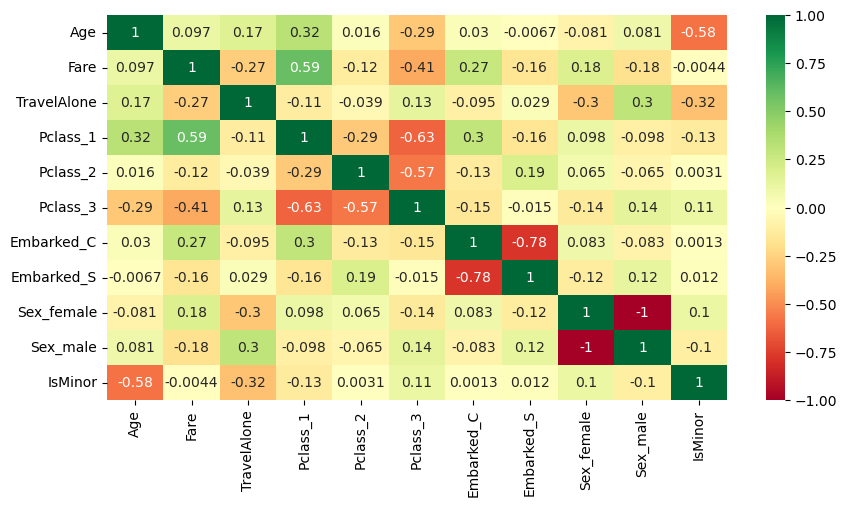

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

No feature is highly correlated with the other, so we can keep all of these features.

### Performing the Model

In [31]:
X.shape, y.shape

((891, 11), (891,))

In [32]:
y=y.to_numpy()
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [33]:
y.shape

(891,)

In [34]:
X=X.to_numpy()
X

array([[22.    ,  7.25  ,  0.    , ...,  0.    ,  1.    ,  0.    ],
       [38.    , 71.2833,  0.    , ...,  1.    ,  0.    ,  0.    ],
       [26.    ,  7.925 ,  1.    , ...,  1.    ,  0.    ,  0.    ],
       ...,
       [28.    , 23.45  ,  0.    , ...,  1.    ,  0.    ,  0.    ],
       [26.    , 30.    ,  1.    , ...,  0.    ,  1.    ,  0.    ],
       [32.    ,  7.75  ,  1.    , ...,  0.    ,  1.    ,  0.    ]])

In [35]:
X.shape, y.shape

((891, 11), (891,))

In [36]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [37]:
class LogisticRegression():
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr=lr
        self.n_iters=n_iters
        self.weights=None
        self.bias=None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias=0
        for i in range(self.n_iters):
            linear_pred = np.dot(X,self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            dw = (1/n_samples)*np.dot(X.T, (predictions - y))
            db = (1/n_samples)*np.sum(predictions - y)
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
    def predict(self, X):
        linear_pred = np.dot(X,self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred=[0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [38]:
#Splitting data into train and test set
def split_data(X, y, test_size=0.2, random_state=0):
    np.random.seed(random_state)
    indices=np.random.permutation(len(X))
    data_test_size=int(X.shape[0]*test_size)
    train_indices=indices[data_test_size:]
    test_indices=indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [39]:
X_train, y_train, X_test, y_test = split_data(X, y, test_size=0.2, random_state=0)

In [40]:
X_train.shape, y_train.shape

((713, 11), (713,))

In [41]:
regressor=LogisticRegression(lr=0.01, n_iters=500)

In [42]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [43]:
def accuracy(y_pred, y_test):
    return (np.sum(y_pred==y_test)/len(y_test))*100

In [ ]:
#Using Accuracy to evaluate our model
acc = accuracy(y_pred, y_test)
print("Accuracy of the model is",acc,"%")

Accuracy of the model is 78.65168539325843 %


In [46]:
def f1_score(predictions, y_test):
    predictions_array = np.array(predictions)
    y_test_array = np.array(y_test)
    tp = np.sum((y_test_array == 1) & (predictions_array == 1))
    fp = np.sum((y_test_array == 0) & (predictions_array == 1))
    tn = np.sum((y_test_array == 0) & (predictions_array == 0))
    fn = np.sum((y_test_array == 1) & (predictions_array == 0))  
    precision = tp / (tp + fp) if tp + fp != 0 else 0
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    print("Precision:", precision)
    print("Recall:", recall)
    f1 = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0
    return f1

In [50]:
f1=f1_score(y_pred, y_test)
print("F1 score:", f1)

Precision: 0.6823529411764706
Recall: 0.8405797101449275
F1 score: 0.7532467532467533


## Performing SVM on the preprocessed dataset

In [62]:
class SVM:
    def __init__(self, lr=0.001, lamb=0.01, iters=1000):
        self.lr=lr
        self.lamb=lamb
        self.iters=iters
        self.w=None
        self.b=None
    def fit(self, X, y):
        samples, features = X.shape
        y_ = np.where(y<=0, -1, 1)
        self.w=np.random.randint(features)
        self.b=0
        for _ in range(self.iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w)-self.b) >= 1
                if condition.all():
                    self.w -= self.lr * (2*self.lamb*self.w)
                else:
                    self.w -= self.lr * (2*self.lamb*self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
    def predict(self, X):
        approx = np.dot(X, self.w)-self.b
        return np.sign(approx)

In [63]:
classifier = SVM()

In [64]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [66]:
f1=f1_score(predictions, y_test)
print("F1 score:", f1)

Precision: 0.6707317073170732
Recall: 1.0
F1 score: 0.8029197080291971


In [85]:
#Using Accuracy to evaluate our model
acc = accuracy(predictions, y_test)
print("Accuracy of the model is",acc,"%")

Accuracy of the model is 30.89887640449438 %


### Implementing PCA on the dataset